# Projek Data Analis

- Nama : Muhammad Pascha Laily Joya Hermansyah
- Email : mc476d5y1229@student.devacademy.id
- ID Dicoding : MC476D5Y1229

# Menentukan Pertanyaan Bisnis

1. Bagaimana perkembangan jumlah peminjamanan dalam perbulan?
2. Bagaimana tren jumlah peminjaman sepeda berdasarkan waktu tertentu dan kapan terjadi lonjakan peminjaman tertinggi?
3. Sejauh mana musim dan kondisi cuaca mempengaruhi jumlah peminjaman sepeda, dan faktor cuaca apa yang memiliki dampak paling besar?
4. bagaimana status user yang meminjam sepedah?
5. Bagaimana jumlah peminjaman di hari libur dan di hari kerja?

# Import Semua Packages/Library yg digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wragling

## Gathering Data

In [2]:
days_df = pd.read_csv("data/day.csv")
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hours_df = pd.read_csv("data/hour.csv")
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Insigh:
1. Saya memasukan 2 data frame dari dataset Bike-sharing-dataset
2. terdapat 2 data frame yaitu peminjaman sepeda perhari dan perjam

## Assessing Data

In [4]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
print("Jumlah duplikasi: ", days_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
print("Jumlah duplikasi: ", hours_df.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
days_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Insigh:
1. dalam dua data frame ini tidak ada missing value dan duplicated data
2. terdapat kesalahan tipe data dalam 2 data frame tersebut yaitu di kolom "dteday" yg seharusnya tipe datanya datetime
3. terdapat beberapa kolom yang memiliki value yg di simbolkan dengan angka seperti di kolom season, yr, mnth, weekday, dam weathrsit
4. ada juga kolom yang memiliki value yg di normalisasikan seperti value asli nya di bagi dengan angka tertentu terdapat di kolom temp, atemp, hum, dan windspeed.

## Cleaning Data

In [10]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  days_df[column] = pd.to_datetime(days_df[column])

In [11]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [12]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  hours_df[column] = pd.to_datetime(hours_df[column])

In [13]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [14]:
hours_df['season'] = hours_df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [15]:
days_df['season'] = days_df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [16]:
hours_df['yr'] = hours_df['yr'].map({0: 2011, 1: 2012})
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,spring,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,spring,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,spring,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,spring,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [17]:
days_df['yr'] = days_df['yr'].map({0: 2011, 1: 2012})
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [18]:
hours_df['mnth'] = hours_df['mnth'].map({1: 'january', 2: 'february', 3: 'march', 4: 'april', 5: 'may', 6: 'june', 7: 'july', 8: 'august', 9: 'september', 10: 'october', 11: 'november', 12: 'december'})
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,2011,january,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,spring,2011,january,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,spring,2011,january,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,spring,2011,january,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,spring,2011,january,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [19]:
days_df['mnth'] = days_df['mnth'].map({1: 'january', 2: 'february', 3: 'march', 4: 'april', 5: 'may', 6: 'june', 7: 'july', 8: 'august', 9: 'september', 10: 'october', 11: 'november', 12: 'december'})
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,2011,january,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,2011,january,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,2011,january,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,2011,january,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,2011,january,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [20]:
hours_df['weekday'] = hours_df['weekday'].map({0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'})
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,2011,january,0,0,saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,spring,2011,january,1,0,saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,spring,2011,january,2,0,saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,spring,2011,january,3,0,saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,spring,2011,january,4,0,saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [21]:
days_df['weekday'] = days_df['weekday'].map({0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'})
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,2011,january,0,saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,2011,january,0,sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,2011,january,0,monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,2011,january,0,tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,2011,january,0,wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [22]:
hours_df['temp'] = hours_df['temp']*41
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,2011,january,0,0,saturday,0,1,9.84,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,spring,2011,january,1,0,saturday,0,1,9.02,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,spring,2011,january,2,0,saturday,0,1,9.02,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,spring,2011,january,3,0,saturday,0,1,9.84,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,spring,2011,january,4,0,saturday,0,1,9.84,0.2879,0.75,0.0,0,1,1


In [23]:
days_df['temp'] = days_df['temp']*41
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,2011,january,0,saturday,0,2,14.110847,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,2011,january,0,sunday,0,2,14.902598,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,2011,january,0,monday,1,1,8.050924,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,2011,january,0,tuesday,1,1,8.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,2011,january,0,wednesday,1,1,9.305237,0.229270,0.436957,0.186900,82,1518,1600


In [24]:
hours_df['atemp'] = hours_df['atemp']*50
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,2011,january,0,0,saturday,0,1,9.84,14.395,0.81,0.0,3,13,16
1,2,2011-01-01,spring,2011,january,1,0,saturday,0,1,9.02,13.635,0.80,0.0,8,32,40
2,3,2011-01-01,spring,2011,january,2,0,saturday,0,1,9.02,13.635,0.80,0.0,5,27,32
3,4,2011-01-01,spring,2011,january,3,0,saturday,0,1,9.84,14.395,0.75,0.0,3,10,13
4,5,2011-01-01,spring,2011,january,4,0,saturday,0,1,9.84,14.395,0.75,0.0,0,1,1


In [25]:
days_df['atemp'] = days_df['atemp']*50
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,2011,january,0,saturday,0,2,14.110847,18.18125,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,2011,january,0,sunday,0,2,14.902598,17.68695,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,2011,january,0,monday,1,1,8.050924,9.47025,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,2011,january,0,tuesday,1,1,8.200000,10.60610,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,2011,january,0,wednesday,1,1,9.305237,11.46350,0.436957,0.186900,82,1518,1600


In [26]:
hours_df['hum'] = hours_df['hum']*100
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,2011,january,0,0,saturday,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,spring,2011,january,1,0,saturday,0,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,spring,2011,january,2,0,saturday,0,1,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,spring,2011,january,3,0,saturday,0,1,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,spring,2011,january,4,0,saturday,0,1,9.84,14.395,75.0,0.0,0,1,1


In [27]:
days_df['hum'] = days_df['hum']*100
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,2011,january,0,saturday,0,2,14.110847,18.18125,80.5833,0.160446,331,654,985
1,2,2011-01-02,spring,2011,january,0,sunday,0,2,14.902598,17.68695,69.6087,0.248539,131,670,801
2,3,2011-01-03,spring,2011,january,0,monday,1,1,8.050924,9.47025,43.7273,0.248309,120,1229,1349
3,4,2011-01-04,spring,2011,january,0,tuesday,1,1,8.200000,10.60610,59.0435,0.160296,108,1454,1562
4,5,2011-01-05,spring,2011,january,0,wednesday,1,1,9.305237,11.46350,43.6957,0.186900,82,1518,1600


In [28]:
hours_df['windspeed'] = hours_df['windspeed']*67
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,2011,january,0,0,saturday,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,spring,2011,january,1,0,saturday,0,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,spring,2011,january,2,0,saturday,0,1,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,spring,2011,january,3,0,saturday,0,1,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,spring,2011,january,4,0,saturday,0,1,9.84,14.395,75.0,0.0,0,1,1


In [29]:
days_df['windspeed'] = days_df['windspeed']*67
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,2011,january,0,saturday,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,spring,2011,january,0,sunday,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,spring,2011,january,0,monday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,spring,2011,january,0,tuesday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,spring,2011,january,0,wednesday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [30]:
hours_df['holiday'] = hours_df['holiday'].map({0: 'no', 1: 'yes'})
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,2011,january,0,no,saturday,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,spring,2011,january,1,no,saturday,0,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,spring,2011,january,2,no,saturday,0,1,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,spring,2011,january,3,no,saturday,0,1,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,spring,2011,january,4,no,saturday,0,1,9.84,14.395,75.0,0.0,0,1,1


In [31]:
days_df['holiday'] = days_df['holiday'].map({0: 'no', 1: 'yes'})
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,2011,january,no,saturday,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,spring,2011,january,no,sunday,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,spring,2011,january,no,monday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,spring,2011,january,no,tuesday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,spring,2011,january,no,wednesday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [32]:
hours_df['workingday'] = hours_df['workingday'].map({0: 'no', 1: 'yes'})
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,2011,january,0,no,saturday,no,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,spring,2011,january,1,no,saturday,no,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,spring,2011,january,2,no,saturday,no,1,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,spring,2011,january,3,no,saturday,no,1,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,spring,2011,january,4,no,saturday,no,1,9.84,14.395,75.0,0.0,0,1,1


In [33]:
days_df['workingday'] = days_df['workingday'].map({0: 'no', 1: 'yes'})
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,2011,january,no,saturday,no,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,spring,2011,january,no,sunday,no,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,spring,2011,january,no,monday,yes,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,spring,2011,january,no,tuesday,yes,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,spring,2011,january,no,wednesday,yes,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [34]:
hours_df['weathersit'] = hours_df['weathersit'].map({1: 'clear', 2: 'cloudy', 3: 'drizzling', 4: 'rain'})
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,2011,january,0,no,saturday,no,clear,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,spring,2011,january,1,no,saturday,no,clear,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,spring,2011,january,2,no,saturday,no,clear,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,spring,2011,january,3,no,saturday,no,clear,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,spring,2011,january,4,no,saturday,no,clear,9.84,14.395,75.0,0.0,0,1,1


In [35]:
days_df['weathersit'] = days_df['weathersit'].map({1: 'clear', 2: 'cloudy', 3: 'drizzling', 4: 'rain'})
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,2011,january,no,saturday,no,cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,spring,2011,january,no,sunday,no,cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,spring,2011,january,no,monday,yes,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,spring,2011,january,no,tuesday,yes,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,spring,2011,january,no,wednesday,yes,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Insigh:
1. merubah tipe data dari dteday dari data frame hours_df dan days_df
2. merubah value kolom season, yr, mnth, holiday, weekday, workingday, dan weathersit di keuda data frame yg awalnya dinotasikan dengan angka menjadi value yang seharusnya
3. merubah value kolom temp, atemp, hum, dan windspeed dari kedua data frame menjadi value aslinya karena sebelumnya telah di normalisasikan dengan di bagi dengan nilai max nya

# Exploration Data Analysis (EDA)

## Explore Data hours_df

In [36]:
hours_df.groupby("hr")["cnt"].mean()

hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    253.661180
14    240.949246
15    251.233196
16    311.983562
17    461.452055
18    425.510989
19    311.523352
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: cnt, dtype: float64

In [37]:
hours_df["hr_group"] = hours_df.hr.apply(lambda x: "Morning" if 5 <= x < 11 else ("Noon" if 11 <= x < 14 else ("Afternoon" if 14 <= x < 18 else ("Evening" if 18 <= x < 22 else "Night"))))
hours_df.groupby(by="hr_group")["cnt"].sum()

hr_group
Afternoon    923409
Evening      826556
Morning      770260
Night        251801
Noon         520653
Name: cnt, dtype: int64

In [53]:
hours_df.groupby("weathersit")["cnt"].sum()

weathersit
clear        2338173
cloudy        795952
drizzling     158331
rain             223
Name: cnt, dtype: int64

### Insigh:
1. mencari jumlah rata-rata peminjaman di setiap jam
2. membuat group dalam jam untuk membuat kategori waktu dan menampilkan jumlahnya
3. mencari jumlah rata-rata peminjaman tergantung cuaca

## Explore Data days_df

In [39]:
days_df.groupby("mnth")["cnt"].sum()

mnth
april        269094
august       351194
december     211036
february     151352
january      134933
july         344948
june         346342
march        228920
may          331686
november     254831
october      322352
september    345991
Name: cnt, dtype: int64

In [40]:
days_df.groupby("weekday")["cnt"].sum()

weekday
friday       487790
monday       455503
saturday     477807
sunday       444027
thursday     485395
tuesday      469109
wednesday    473048
Name: cnt, dtype: int64

In [41]:
conditions = [
    (days_df['holiday'] == 'no') & (days_df['workingday'] == 'no'),
    (days_df['holiday'] == 'yes') & (days_df['workingday'] == 'no')
]
values = ['weekend', 'holiday']
days_df['day_category'] = np.select(conditions, values, default='weekday')
days_df.groupby(by = "day_category")["cnt"].sum()

day_category
holiday      78435
weekday    2292410
weekend     921834
Name: cnt, dtype: int64

In [42]:
days_df.groupby("season")["cnt"].sum()

season
fall      1061129
spring     471348
summer     918589
winter     841613
Name: cnt, dtype: int64

In [43]:
days_df[["casual", "registered"]].sum()

casual         620017
registered    2672662
dtype: int64

### Insigh:
1. mencari total peminjaman tiap bulannya
2. mencari total peminjaman per hari
3. membuat categori hari dan mencari total peminjaman dari kategori hari
4. mencari total peminjaman berdasarkan status peminjam antara yg sudah registrasi atau belum 

# Data Visualization

## Bagaimana perkembangan jumlah peminjamanan dalam perbulan?

In [44]:
monthly_df = days_df.resample(rule='ME', on='dteday').agg({
    "mnth": "nunique",
    "cnt": "sum"
})
monthly_df.index = monthly_df.index.strftime('%Y-%m')
monthly_df = monthly_df.reset_index()
monthly_df.rename(columns={
    "mnth": "month",
    "cnt": "Total rentals"
}, inplace=True)
monthly_df.head()

,dteday,month,Total rentals
0,2011-01,1,38189
1,2011-02,1,48215
2,2011-03,1,64045
3,2011-04,1,94870
4,2011-05,1,135821


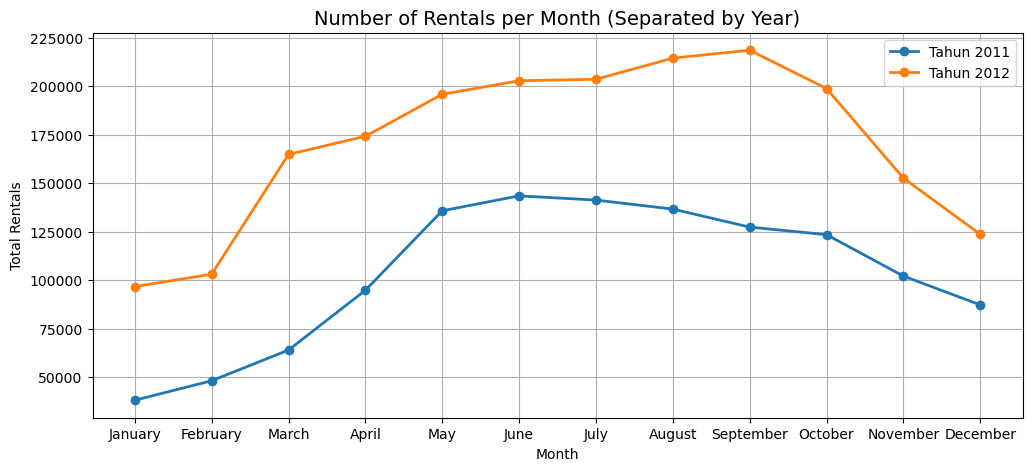

In [45]:
monthly_df = days_df.resample(rule='ME', on='dteday').agg({
    "yr": "first",  # Mengambil tahun pertama dari setiap bulan
    "cnt": "sum"  # Menjumlahkan total rentals per bulan
})

# Mengubah index menjadi format nama bulan
monthly_df["month"] = monthly_df.index.strftime('%B')

# Reset index agar menjadi dataframe biasa
monthly_df = monthly_df.reset_index()

# Rename kolom
monthly_df.rename(columns={"cnt": "total rentals"}, inplace=True)

# Plot data per tahun
plt.figure(figsize=(12, 5))
for year in monthly_df["yr"].unique():
    data_year = monthly_df[monthly_df["yr"] == year]
    plt.plot(data_year["month"], data_year["total rentals"], marker='o', linewidth=2, label=f"Tahun {year}")

plt.title("Number of Rentals per Month (Separated by Year)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Total Rentals")
plt.legend()
plt.grid()
plt.show()

## Bagaimana tren jumlah peminjaman sepeda berdasarkan waktu tertentu dan kapan terjadi lonjakan peminjaman tertinggi?

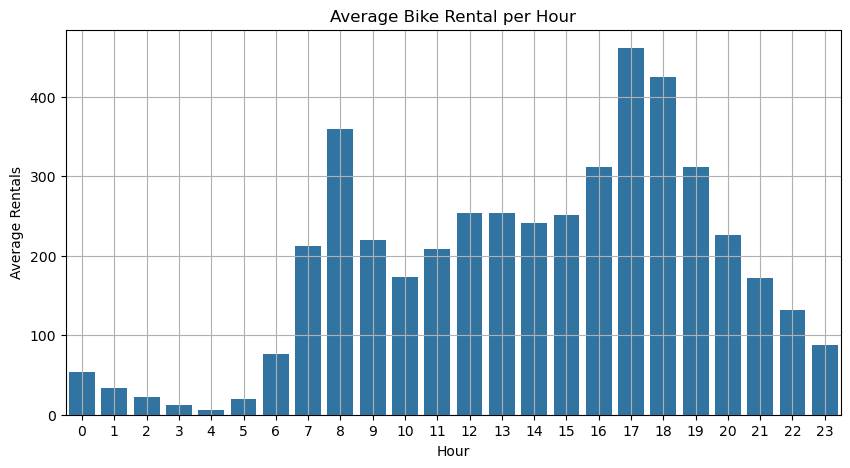

In [46]:
hourly_rentals = hours_df.groupby("hr")["cnt"].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_rentals.index, y=hourly_rentals.values)
plt.xlabel("Hour")
plt.ylabel("Average Rentals")
plt.title("Average Bike Rental per Hour")
plt.xticks(range(0, 24))
plt.grid()
plt.show()

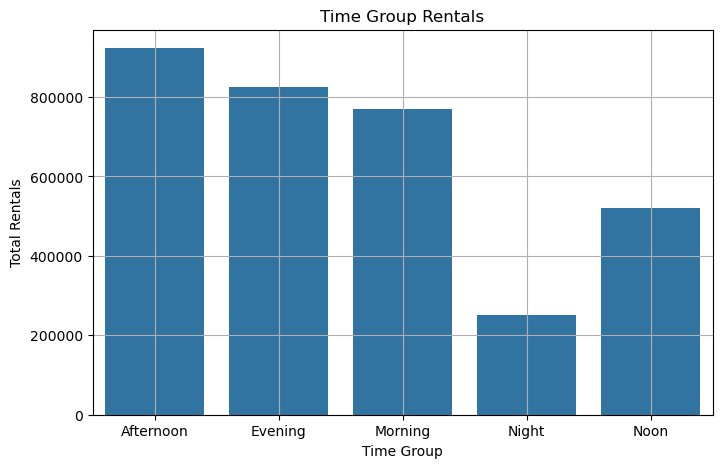

In [47]:
time_rentals = hours_df.groupby("hr_group")["cnt"].sum()


plt.figure(figsize=(8, 5))
sns.barplot(x=time_rentals.index, y=time_rentals.values)
plt.xlabel("Time Group")
plt.ylabel("Total Rentals")
plt.title("Time Group Rentals")
plt.grid()

## Sejauh mana musim dan kondisi cuaca mempengaruhi jumlah peminjaman sepeda, dan faktor cuaca apa yang memiliki dampak paling besar?

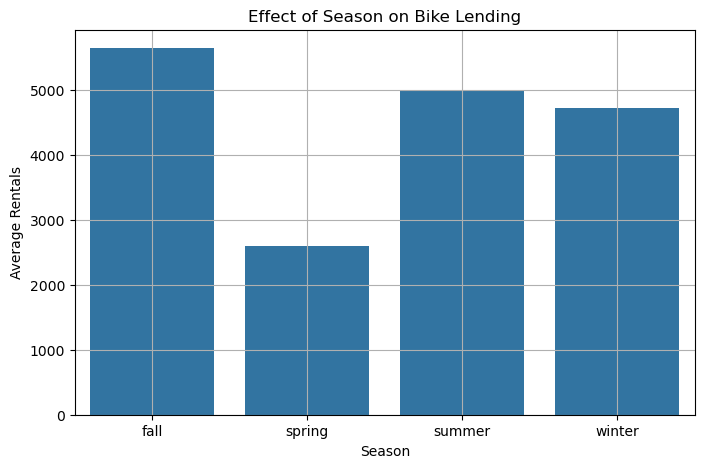

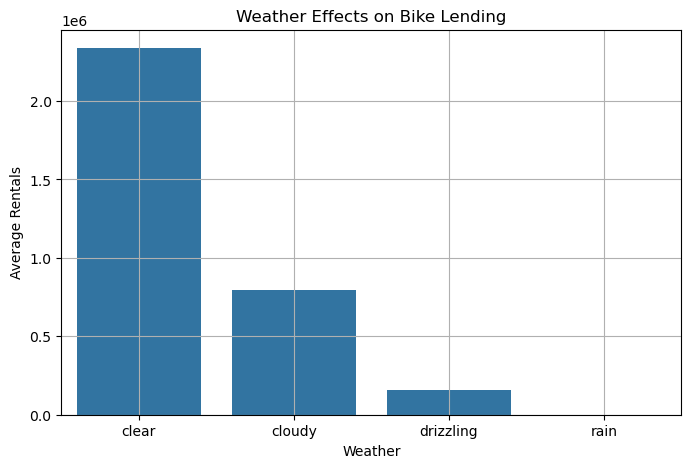

In [52]:
season_rentals = days_df.groupby("season")["cnt"].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=season_rentals.index, y=season_rentals.values)
plt.xlabel("Season")
plt.ylabel("Average Rentals")
plt.title("Effect of Season on Bike Lending")
plt.grid()
plt.show()

weather_rentals = hours_df.groupby("weathersit")["cnt"].sum()

plt.figure(figsize=(8, 5))
sns.barplot(x=weather_rentals.index, y=weather_rentals.values)
plt.xlabel("Weather")
plt.ylabel("Average Rentals")
plt.title("Weather Effects on Bike Lending")
plt.grid()
plt.show()

## Bagaimana status user yang meminjam sepedah?

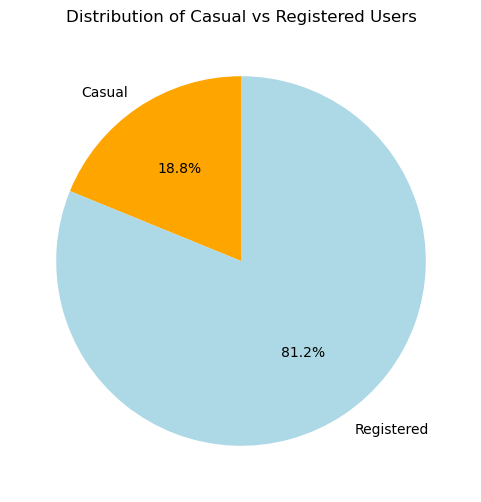

In [49]:
casual_registered = days_df[["casual", "registered"]].sum()

plt.figure(figsize=(6, 6))
plt.pie(casual_registered, labels=["Casual", "Registered"], autopct='%1.1f%%', colors=["orange", "lightblue"], startangle=90)
plt.title("Distribution of Casual vs Registered Users")
plt.show()

## Bagaimana jumlah peminjaman di hari libur dan di hari kerja?

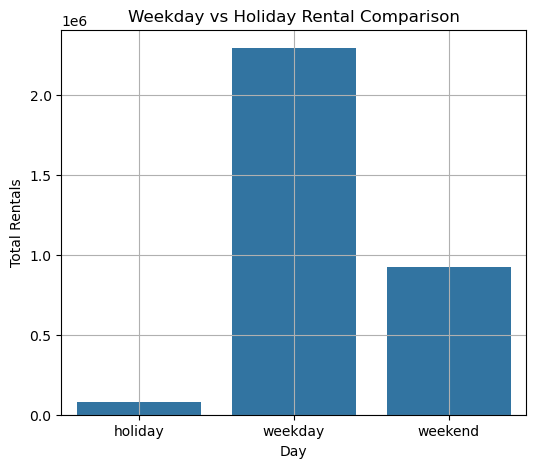

In [50]:
conditions = [
    (days_df['holiday'] == 'no') & (days_df['workingday'] == 'no'),
    (days_df['holiday'] == 'yes') & (days_df['workingday'] == 'no')
]
values = ['weekend', 'holiday']
days_df['day_category'] = np.select(conditions, values, default='weekday')
category_days_rentals = days_df.groupby(by = "day_category")["cnt"].sum()

plt.figure(figsize=(6, 5))
sns.barplot(x=category_days_rentals.index, y=category_days_rentals.values)
plt.xlabel("Day")
plt.ylabel("Total Rentals")
plt.title("Weekday vs Holiday Rental Comparison")
plt.grid()
plt.show()

### Insigh:
1. menampilkan data total peminjaman per bulan selama 2 tahun
2. menampilkan data total dan rata-rata peminjaman perjam dan perkelompok waktu
3. menampilkan data peminjaman berdasarkan cuaca dan musim
4. menampilkan data user yang sudah registrasi dan yang belum untuk perbandingan jumlah user yang melakukan pemijaman
5. menampilkan data peminjaman berdasarkan hari libur atau tidak


# Conlusion : 
1. Berdasarkan data dua tahun terakhir, jumlah peminjaman sepeda secara keseluruhan mengalami tren peningkatan setiap bulan. Pada tahun pertama terdapat kenaikan yang cukup signifikan dari milai bulan Februari hingga Mei dan di bulan bulan setelah nya cukup stagnan dan mendapat penurunan dengan skala yang kecil hingga di bulan Oktober terjadi penurunan yg cukup besar hingga akhir tahun. Sedangkan di tahun kedua terjadi kenaikan yg sangan signifikan terjadi di bulan Februari, kenaikan terus berjalan secara perlahan hingga mendekati akhir tahun mengalami penurunan kembali seperti pada tahun pertama. Penurunan ini kemungkinan disebabkan oleh faktor cuaca, musim dan juga perubahan pola aktivitas pengguna, seperti libur akhir tahun. 
2. Analisis terhadap pola waktu menunjukkan lonjakan peminjaman terbesar terjadi pada pukul 08.00 pagi dan 17.00 sore, dan pada siang hari tidak ada penurunan yang terlalu drastis. Hal ini menunjukan bahwa kemungkinan sepeda banyak digunakan sebagai sarana transportasi harian khusunya seperti untuk berangkat dan pulang kerja atau sekolah.
3. Cuaca memiliki dampak yang signifikan terhadap jumlah peminjaman sepeda. Saat cerah, jumlah penminjaman sepedah mengalami kenaikan sangat drastis. Sedangkan hujan, jumlah peminjaman mengalami penurunan drastis. Sementara itu, perubahan musim memiliki pengaruh yang lebih kecil terhadap jumlah peminjaman dibandingkan cuaca harian.
4. Sebagian besar pengguna yang meminjam sepeda adalah pengguna yang sudah registrasi, yang jumlahnya mencapai lebih dari 80% lebih banyak dibandingkan pengguna biasa (casual users). Ini menunjukkan bahwa pengguna yang sudah registrasi lebih sering menggunakan layanan dan menadikan sepedah alat transportasi harian mereka dibandingkan pengguna yang tidak terdaftar.
5. Aktivitas peminjaman lebih tinggi pada hari kerja dibandingkan hari libur. Hal ini mendukung pembahasan sebelumnya bahwa sepeda sering digunakan untuk transportasi harian, bukan sekadar rekreasi.

In [51]:
days_df.to_csv("day_data.csv", index=False)
hours_df.to_csv("hour_data.csv", index=False)
